## 1.input Data 입수

In [18]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

res_table = pd.read_excel('./sample.xlsx',
                            sheet_name ='output'
                           ,header = 0)

row_table = pd.read_excel('./sample.xlsx',
                           sheet_name ='input',
                           header = 0)

std_res = list(res_table.columns)
res_name =list(res_table.iloc[0])
del res_name[0]

 ## 2.sample.xlsx라는 엑셀 파일문서에서 일간데이터를 설정한다. 

In [19]:
# 일단 일간수익률 테이블을 만들어서 넣는다.
index        = list(row_table.columns)
index_header = list(row_table.columns)
index_header.append("portfolio_yield")
del index[0]
yield_lst     = []
yield_lst_set = []
yield_table  = pd.DataFrame(columns=index_header)ㅠ
port_yield   = 0.0

## 3.Daily Yield수익률을 구한다.

In [20]:
#행의 개수만큼 돌린다. 수익률을 구한다.
for i in range( 1, row_table.shape[0]-1 ):
    yield_lst = []
    port_yield = 0.0
    yield_lst.append(row_table.iloc[i + 1]['date'])
    for index_name in index:
        imsi= row_table.iloc[i + 1][index_name] / row_table.iloc[i][index_name] - 1
        yield_lst.append(imsi)
        if index_name != 'MXWD INDEX' and index_name != 'USDKRW Curncy' :
            port_yield = port_yield + (imsi) * row_table.iloc[0][index_name]
        else:
            pass
    yield_lst.append(port_yield)
    yield_lst_set =[]
    yield_lst_set.append(tuple(yield_lst))
    df2 = pd.DataFrame.from_records(yield_lst_set,columns=index_header)
    yield_table=yield_table.append(df2)
yield_table = yield_table.reset_index(drop=True)

## 4.분기별 수익률을 산출

In [9]:
#분기별 수익률을 산출한다.
port_yield   = 0.0
yield_lst    = []

gl_yld_lst   = []
port_yld_lst = []
date_yld_lst  = []
qt_yield_table  = pd.DataFrame(columns=index_header)

for i in range(0, len(std_res)-1):
    yield_lst = []
    port_yield = 0.0
    str_expr1 = "date=={}".format(std_res[i])
    str_expr2 = "date=={}".format(std_res[i+1])
    df1 = row_table.query(str_expr1)
    df2 = row_table.query(str_expr2)

    yield_lst.append(std_res[i+1])


    for index_name in index:
        q_y = df2.iloc[0][index_name] / df1.iloc[0][index_name] - 1
        yield_lst.append(q_y)
        if index_name == 'MXWD INDEX':
            gl_yld_lst.append(q_y)

        if index_name != 'MXWD INDEX' and index_name != 'USDKRW Curncy' :
            port_yield = port_yield + (q_y) * row_table.iloc[0][index_name]
        else:
            pass

    port_yld_lst.append(port_yield)
    date_yld_lst.append(row_table.iloc[i + 1]['date'])
    yield_lst.append(port_yield)
    yield_lst_set =[]
    yield_lst_set.append(tuple(yield_lst))
    df2 = pd.DataFrame.from_records(yield_lst_set,columns=index_header)
    qt_yield_table = qt_yield_table.append(df2)

qt_yield_table = qt_yield_table.reset_index(drop=True)

## 5.분기별 변동성을 산출

In [21]:
#분기별 변동성을 산출한다.
vol_date_lst   = []
port_vol_lst   = []
global_vol_lst = []
for i in range(0, len(std_res)-1):
    str_expr1            = "date>={0} and date < {1}".format(std_res[i],std_res[i+1])
    df1                  = yield_table.query(str_expr1)
    global_index_list    = list(df1['MXWD INDEX'])
    portfolio_index_list = list(df1['portfolio_yield'])

    global_vol    = np.std(global_index_list)    * math.sqrt(252)  # array로 뽑아서 넣어야 함
    portfolio_vol = np.std(portfolio_index_list) * math.sqrt(252)  # array로 뽑아서 넣어야 함

    vol_date_lst.append(std_res[i+1])
    port_vol_lst.append(portfolio_vol)
    global_vol_lst.append(global_vol)

## 6.그래프로 산출하여 보여준다.

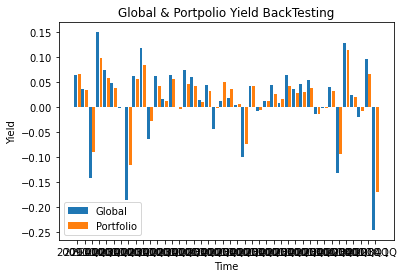

In [22]:
def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]

value_a_x = create_x(2, 1, 1, len(res_name))
value_b_x = create_x(2, 1, 2, len(res_name))
ax = plt.subplot()
ax.bar(value_a_x, gl_yld_lst)
ax.bar(value_b_x, port_yld_lst)
middle_x = [(a+b)/2 for (a,b) in zip(value_a_x, value_b_x)]
ax.set_xticks(middle_x)
ax.set_xticklabels(res_name)
plt.title('Global & Portpolio Yield BackTesting')
plt.legend(['Global' , 'Portfolio'])
plt.xlabel('Time')
plt.ylabel('Yield')
plt.show()
